In [2]:
import numpy as np

In [3]:
# first, define our problem size
n = 10
alpha = np.random.random((n, 1))
sigma = np.random.random((n, 1))
k = np.random.random((n, n))

# goal, generate some vector r such that:
# sum(r) = 1.0
# r represents our optimal investment portfolio


In [4]:
# element-wise math

# square every term in alpha
alpha_element_squared = alpha * alpha
sigma_element_squared = sigma * sigma

# the 3.9 formula from
# https://maslov.bioengineering.illinois.edu/optimal_investment_ijtaf.pdf
alpha / (alpha_element_squared + sigma_element_squared)


array([[0.93329179],
       [1.22760879],
       [0.81148042],
       [1.79679455],
       [1.12553856],
       [0.05770808],
       [0.45968542],
       [1.16683004],
       [0.81377253],
       [1.31633645]])

In [5]:
# invert matrices
k_inv = np.linalg.inv(k)

# formula 3.10 from 
# https://maslov.bioengineering.illinois.edu/optimal_investment_ijtaf.pdf
r_opt = np.dot(k_inv, alpha)


In [6]:
# hints that I'm not sure how they all go together

# from formula 3.11
# you know that if \lambda >= \alpha_i, then we can ignore that term

# Maybe if you sort all fo the \alpha_i terms, you can see if a solution for lambda exists where all of the smaller
# values are ignored, and all of the larger values are effected by \lambda

# if you look at each term in the sum of 3.12, they are piecewise linear wrt. \lambda


In [43]:
# idea one to solve this: use line search
# main idea: function 3.12 is monotically decreasing
# so if we pick upper/lower bounds of lambda, we can just do a line search and call it a day
# monotonically decreasing means the derivative of the function wrt lambda is <= 0 across all values of lambda

# upper bound, we know that if lambda causes all of the terms to be zero, we went too far.
# i.e., alpha_i - upper_bound_lambda <= 0 \forall i
upper_bound_lambda = np.max(alpha)

# lower bound, we know that each term in the sum is >= 0 and <= the total sum term.
# so just find the lower bound of each term and take the maximum out of all of these terms
# for each term, lambda = alpha_i - alpha_i^2 - sigma_i^2
# I know this because I can do high-school algebra in my head... work it out on paper if you can't
lower_bound_lambda = np.max(alpha - alpha_element_squared - sigma_element_squared)

print(lower_bound_lambda, upper_bound_lambda)

# now line search/binary search... first we need to evaluate the value of the 3.12 summation expression
def eval_expression(lambda_value):
    # subtract one so I can get something like \sum - 1 = 0 to solve.
    fractional_terms = (alpha - lambda_value) / (alpha_element_squared + sigma_element_squared)
    # heavyside function
    fractional_terms = np.maximum(fractional_terms, 0)
    return np.sum(fractional_terms) - 1

# sanity check, the correct value (0) is between the upper bound and lower bound
eval_expression(lower_bound_lambda), eval_expression(upper_bound_lambda)

# there's a tolerance term usually, more on that later
tolerance = 1e-9

# initialize our loop with our initial guess
lower_lambda = lower_bound_lambda
upper_lambda = upper_bound_lambda
middle_lambda = (lower_bound_lambda + upper_bound_lambda) / 2

iterations = 0
while np.abs(eval_expression(middle_lambda)) > tolerance:
    middle_value = eval_expression(middle_lambda)
    if middle_value > 0:
        lower_lambda = middle_lambda
    else:
        upper_lambda = middle_lambda
    middle_lambda = (lower_lambda + upper_lambda) / 2

    iterations += 1
    print(f'iteration: {iterations}, {middle_lambda}, {eval_expression(middle_lambda)}')


0.23626872326862727 0.9866177707928309
iteration: 1, 0.79903050891178, -0.7848512929583762
iteration: 2, 0.7052368779712546, -0.4609264738146964
iteration: 3, 0.6583400625009919, -0.20477531028256668
iteration: 4, 0.6348916547658605, -0.04550049992872829
iteration: 5, 0.6231674508982947, 0.05670575349348583
iteration: 6, 0.6290295528320776, 0.004716650231985531
iteration: 7, 0.6319606037989691, -0.021277901398765064
iteration: 8, 0.6304950783155234, -0.008280625583390266
iteration: 9, 0.6297623155738006, -0.001781987675702923
iteration: 10, 0.6293959342029392, 0.0014673312781410264
iteration: 11, 0.6295791248883699, -0.0001573281987810038
iteration: 12, 0.6294875295456546, 0.0006550015396793452
iteration: 13, 0.6295333272170123, 0.0002488366704487266
iteration: 14, 0.629556226052691, 4.575423583430549e-05
iteration: 15, 0.6295676754705304, -5.578698147279404e-05
iteration: 16, 0.6295619507616107, -5.016372819355297e-06
iteration: 17, 0.6295590884071509, 2.0368931507031007e-05
iteration

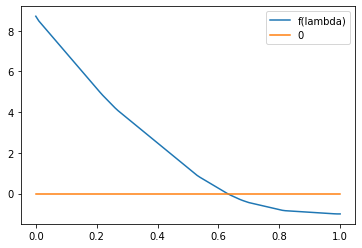

In [39]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
plt.plot(x, [eval_expression(el) for el in x], label='f(lambda)')
plt.plot([0, 1], [0, 0], label='0')
plt.legend()

plt.show()


In [23]:
(alpha - lower_bound_lambda) / (alpha_element_squared + sigma_element_squared)

array([[ 0.70979322],
       [ 0.87092041],
       [ 0.08806014],
       [ 1.        ],
       [ 0.74532619],
       [-3.83076566],
       [-0.0421737 ],
       [ 0.75814746],
       [ 0.57798399],
       [ 0.82581529]])